# Quality Model

**Sarv** 

---



> wine check




# Exploratory Data Analysis and Visualisation

In [83]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import time
import random

random.seed(100)


In [55]:


# Importing the dataset
wine = pd.read_csv('winequality.csv')

In [56]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
# #Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()


quality
0    1599
Name: count, dtype: int64

<Axes: ylabel='count'>

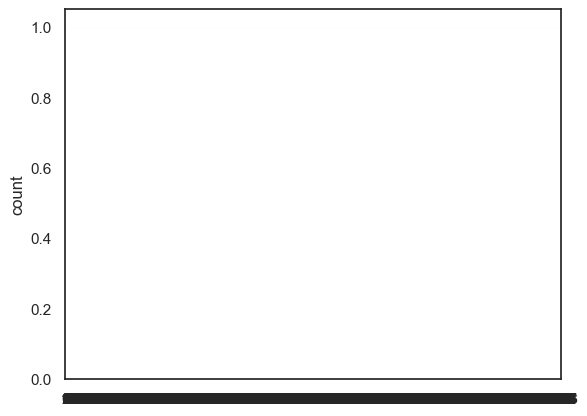

In [58]:

#plotting the response variable
sns.countplot(wine['quality'])


In [59]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

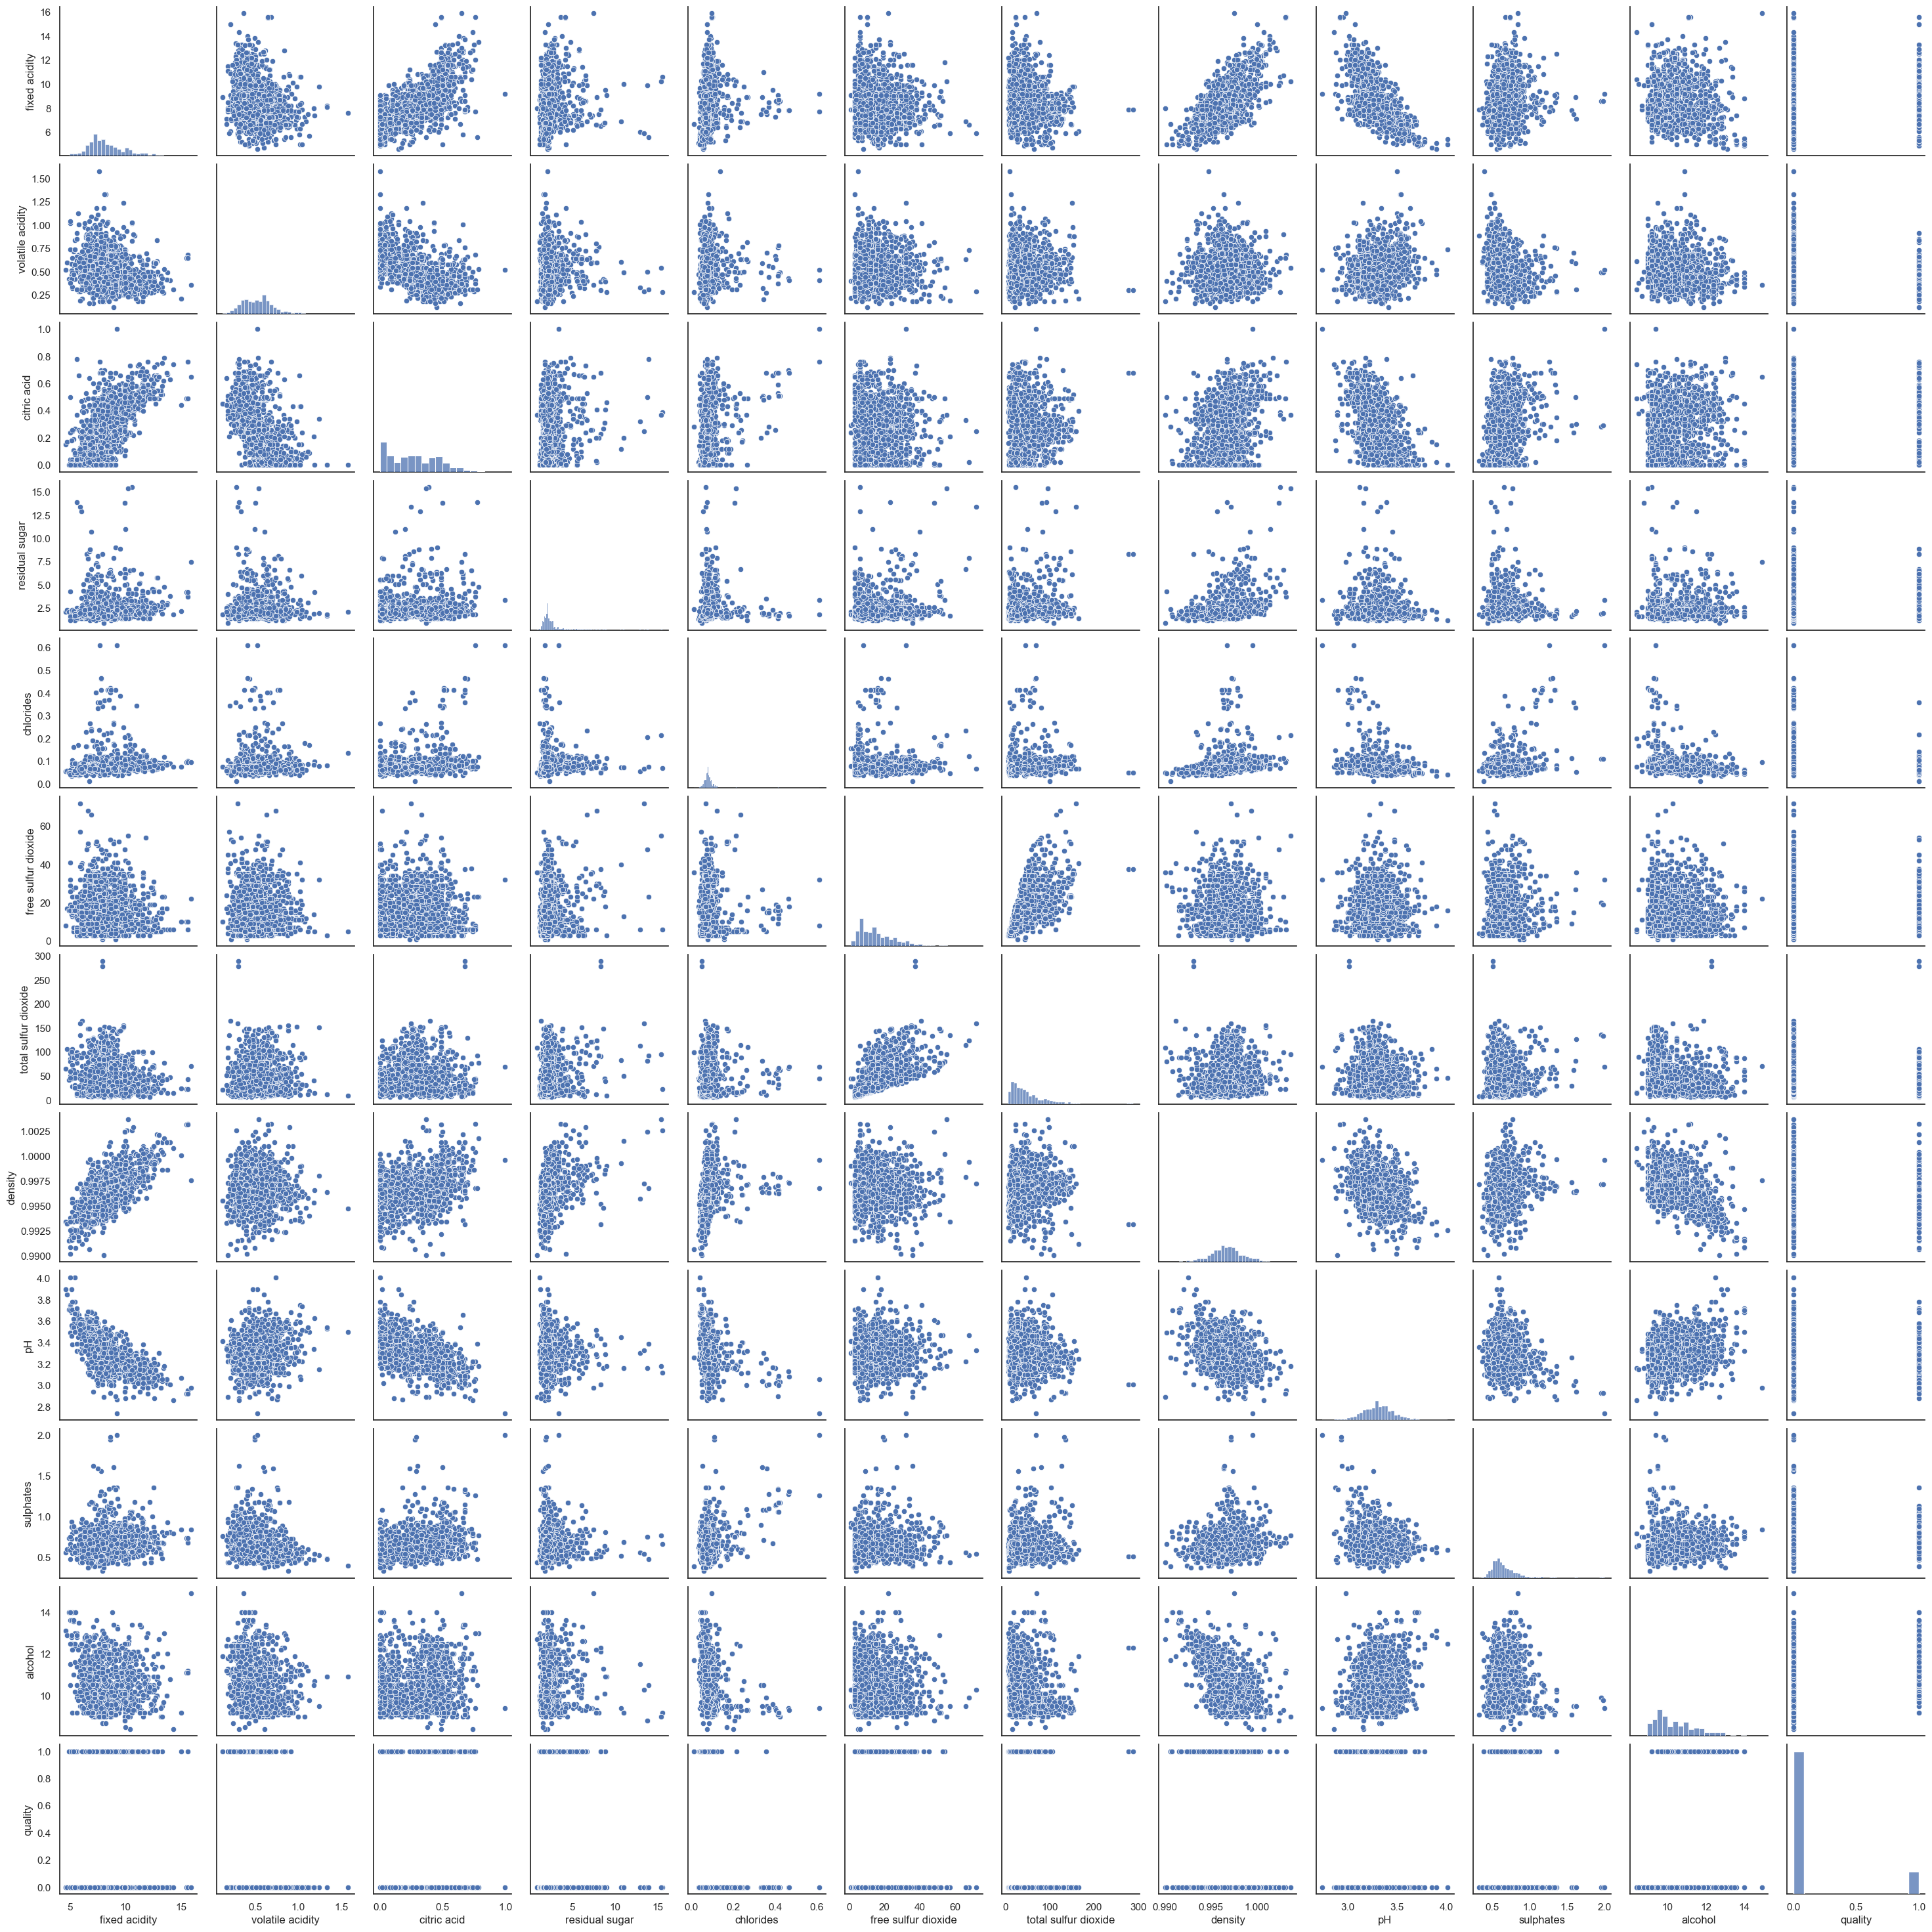

In [60]:
sns.pairplot(wine)

In [61]:
wine[wine.columns[:11]].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


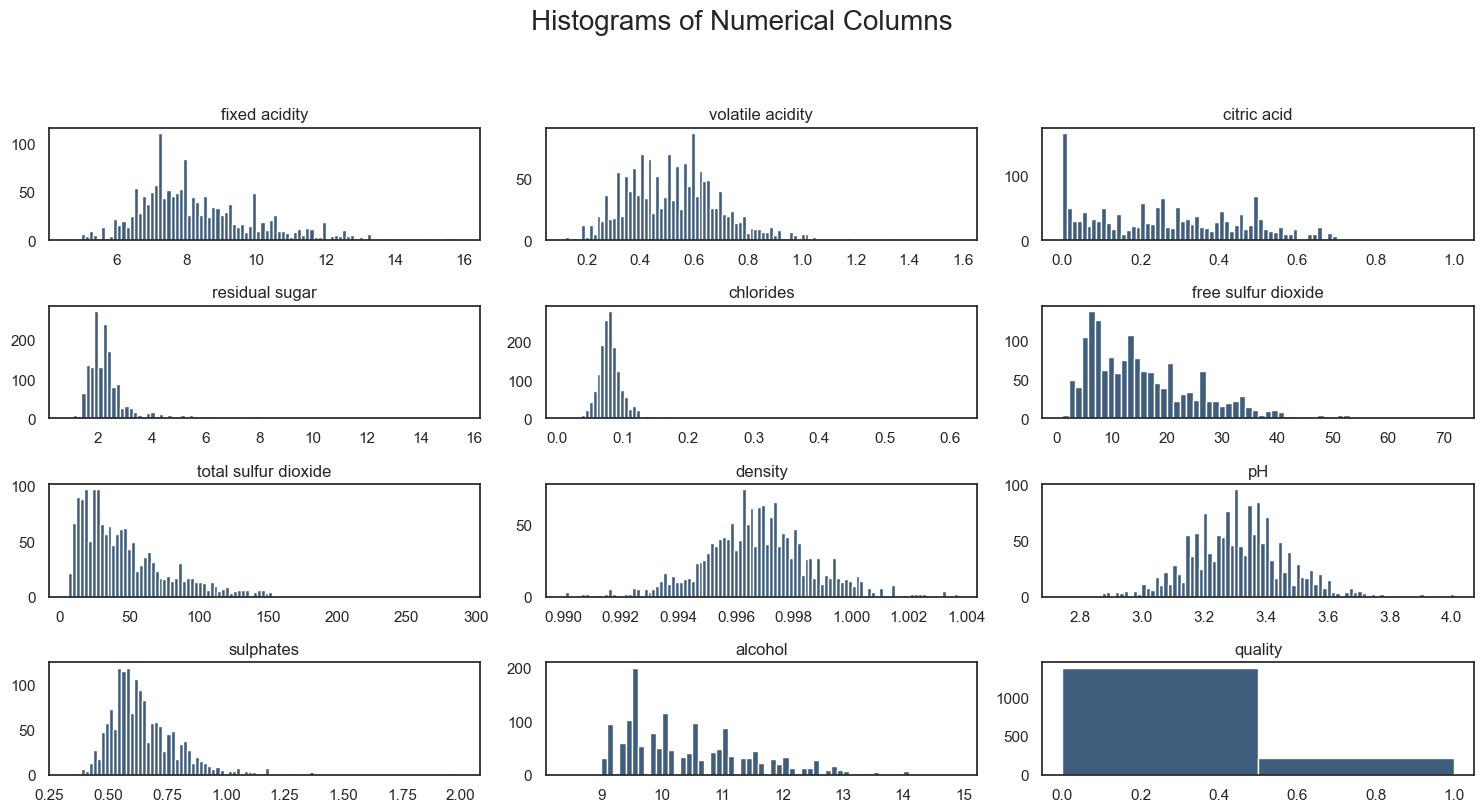

In [62]:
## Histograms
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(wine.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [63]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: title={'center': 'Correlation with quality'}>

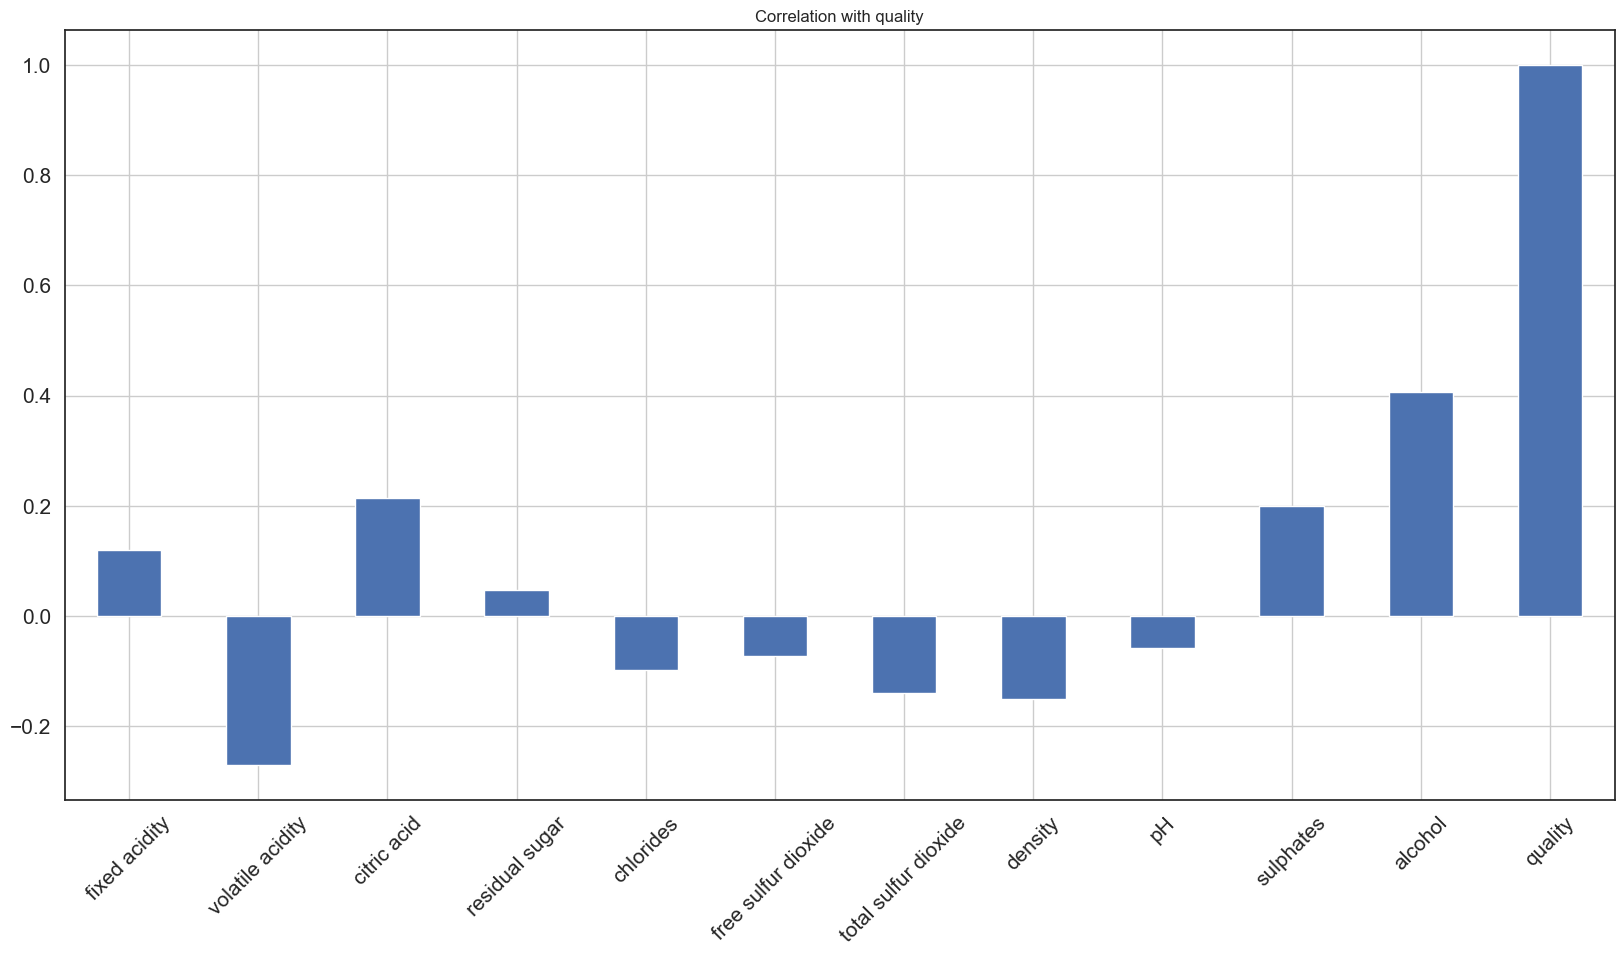

In [64]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [65]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = wine.corr()

In [66]:
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308


<Axes: >

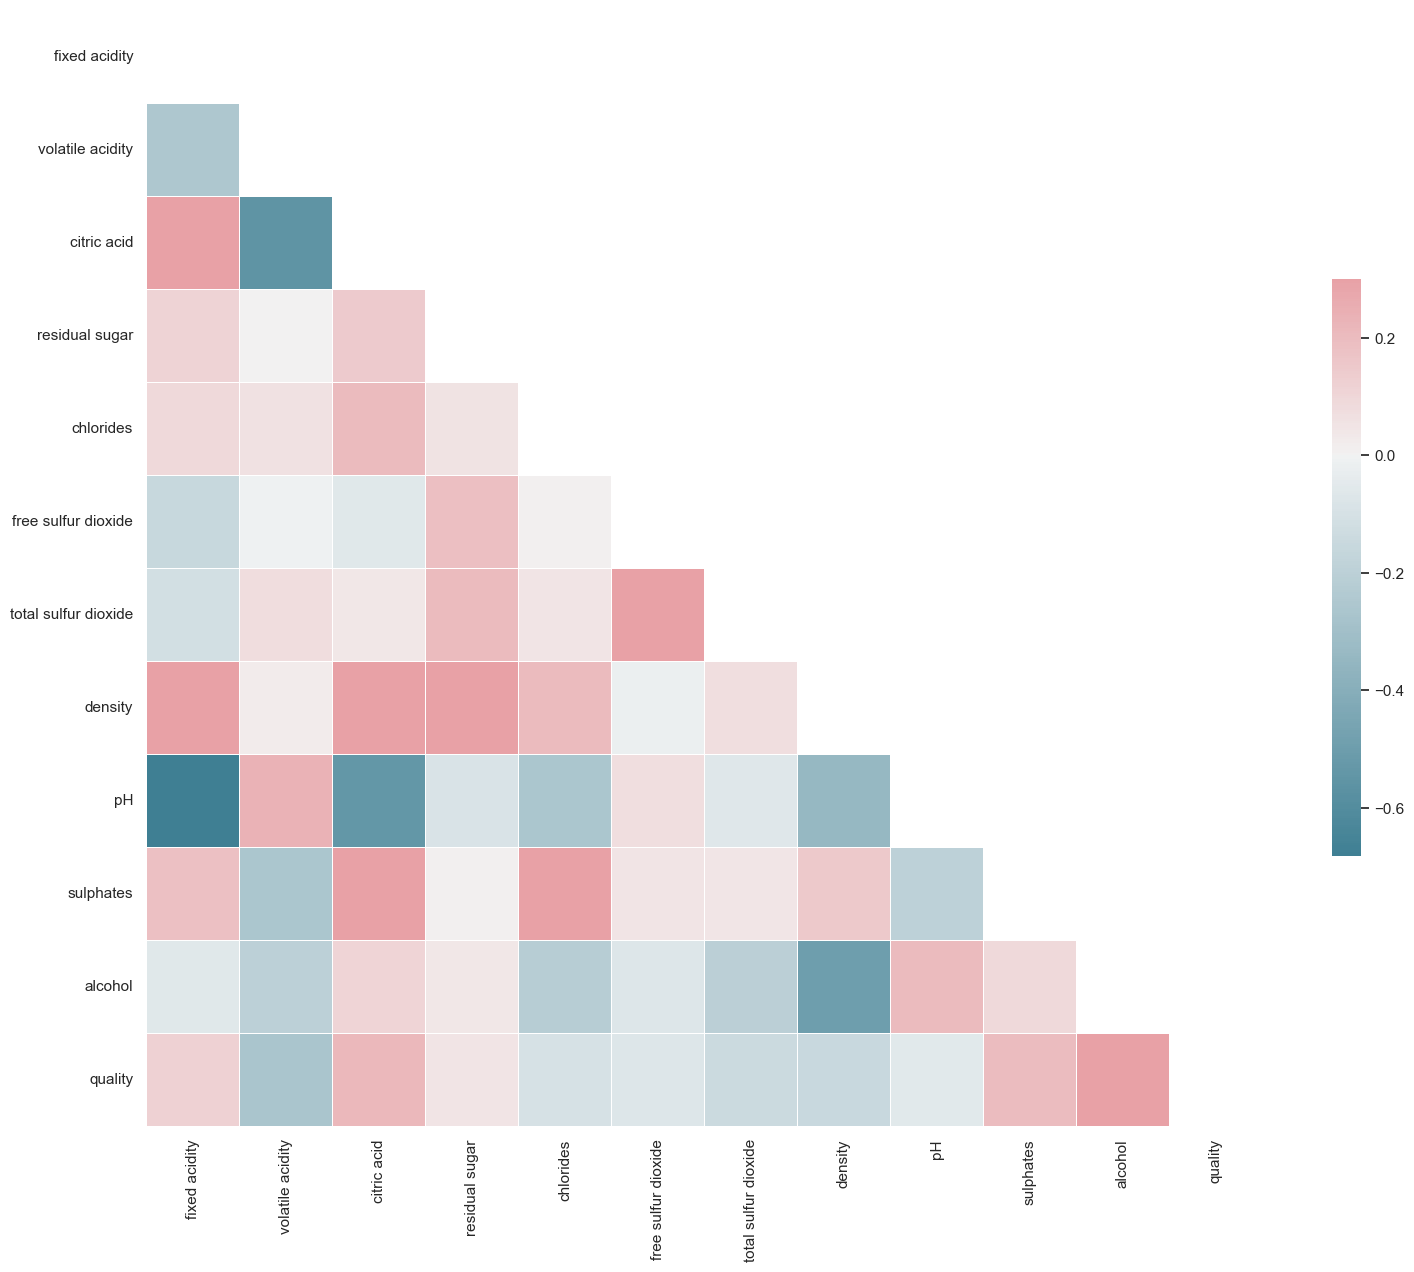

In [67]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Enggineering

In [68]:
#Assigning and dividing the dataset
X = wine.drop('quality',axis=1)
y=wine['quality']

In [69]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [71]:
wine.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [72]:
features_label = wine.columns[:11]

In [73]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.178690
 2) volatile acidity               0.128748
 3) citric acid                    0.106496
 4) residual sugar                 0.095718
 5) chlorides                      0.089280
 6) free sulfur dioxide            0.083482
 7) total sulfur dioxide           0.070669
 8) density                        0.070104
 9) pH                             0.060459
10) sulphates                      0.060048
11) alcohol                        0.056307


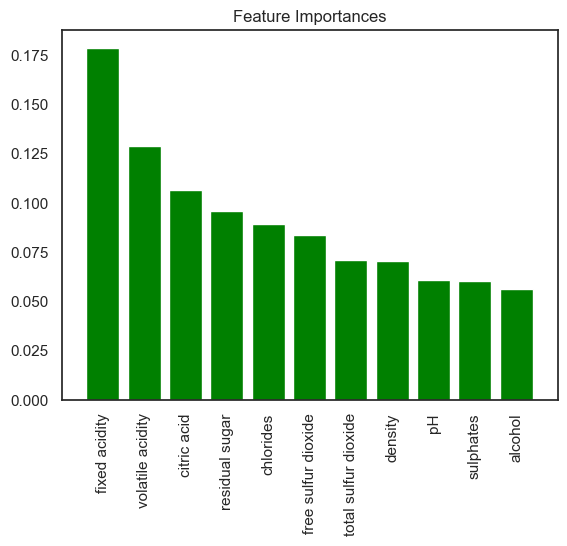

In [74]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [75]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [77]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.281687
1  0.171462
2  0.143245
3  0.114765


In [78]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.86875        0.6  0.26087  0.363636


In [79]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Train the SVM (Linear) classifier
classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Initialize results DataFrame if not already initialized
try:
    results
except NameError:
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create model results DataFrame
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Concatenate results DataFrames
results = pd.concat([results, model_results], ignore_index=True)

print(results)


                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.86875        0.6  0.26087  0.363636
1         SVM (Linear)   0.85625        0.0  0.00000  0.000000


c:\Users\91939\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Train the SVM (RBF) classifier
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Initialize results DataFrame if not already initialized
try:
    results
except NameError:
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create model results DataFrame
model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Concatenate results DataFrames
results = pd.concat([results, model_results], ignore_index=True)

print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.86875   0.600000  0.260870  0.363636
1         SVM (Linear)   0.85625   0.000000  0.000000  0.000000
2            SVM (RBF)   0.87500   0.714286  0.217391  0.333333


In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Initialize results DataFrame if not already initialized
try:
    results
except NameError:
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create model results DataFrame
model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Concatenate results DataFrames
results = pd.concat([results, model_results], ignore_index=True)

print(results)


                   Model  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.868750   0.600000  0.260870  0.363636
1           SVM (Linear)  0.856250   0.000000  0.000000  0.000000
2              SVM (RBF)  0.875000   0.714286  0.217391  0.333333
3  Random Forest (n=100)  0.903125   0.741935  0.500000  0.597403
